In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
os.chdir('/content/drive/MyDrive/Project_1')

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
from keras.applications.efficientnet import EfficientNetB0, preprocess_input, decode_predictions
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import shutil
%matplotlib inline

In [39]:
from sklearn.metrics import classification_report

In [3]:
# ## split data in train and val
data_dir ='./256_ObjectCategories'
output_dir ='./splitted_256_ObjectCategories'
train_dir = os.path.join(output_dir,'train')
val_dir = os.path.join(output_dir,'val')
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)

# for category in os.listdir(data_dir):
#   train_category_dir = os.path.join(train_dir, category)
#   val_category_dir = os.path.join(val_dir,category)
#   if not os.path.exists(train_category_dir):
#     category_dir = os.path.join(data_dir,category)
#     image_files = os.listdir(category_dir)

#     train_imgs, val_imgs = train_test_split(image_files, test_size=0.2, random_state=42)

#     os.makedirs(train_category_dir,exist_ok=True)
#     os.makedirs(val_category_dir,exist_ok=True)

#     # Move the images to the respective directories
#     for image in train_imgs:
#       src = os.path.join(category_dir, image)
#       dest = os.path.join(train_category_dir, image)
#       shutil.copy(src, dest)

#     for image in val_imgs:
#       src = os.path.join(category_dir, image)
#       dest = os.path.join(val_category_dir, image)
#       shutil.copy(src, dest)

In [4]:
train_datagen = image.ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
val_datagen = image.ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, target_size =(224,224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size =(224,224), batch_size=32, class_mode='categorical')

Found 24385 images belonging to 257 classes.
Found 6222 images belonging to 257 classes.


In [5]:
train_generator

In [6]:
## Loading the base model

model_base = EfficientNetB0(input_shape=(224,224,3), include_top=False,weights='imagenet')

for layer in model_base.layers:
  layer.trainable = False

In [7]:
model_base.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0

In [19]:
# from keras.src.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
## Build the model

x = model_base.output
# average pooling layer
av1 = GlobalAveragePooling2D()(x)
# fully connected layer
fc1 = Dense(512, activation="relu")(av1)
# dropout layer
d1 = Dropout(0.5)(fc1)

# Add a final sigmoid layer with 256 node for classification output
predictions = Dense(257, activation="softmax")(d1)
model_final = Model(inputs = model_base.input, outputs = predictions)

In [20]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.00003)

In [21]:
model_final.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model_final.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']    

In [23]:
eff_history = model_final.fit_generator(train_generator, validation_data=val_generator, steps_per_epoch=100, epochs=15)

C:\Users\skhatta\AppData\Local\Temp\ipykernel_25936\3592927869.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  eff_history = model_final.fit_generator(train_generator, validation_data=val_generator, steps_per_epoch=100, epochs=15)


Epoch 1/15
100/100 [==============================] - 300s 3s/step - loss: 5.5378 - accuracy: 0.0178 - val_loss: 5.4692 - val_accuracy: 0.0267
Epoch 2/15
100/100 [==============================] - 207s 2s/step - loss: 5.4822 - accuracy: 0.0300 - val_loss: 5.4688 - val_accuracy: 0.0267
Epoch 3/15
100/100 [==============================] - 193s 2s/step - loss: 5.4629 - accuracy: 0.0247 - val_loss: 5.4397 - val_accuracy: 0.0257
Epoch 4/15
100/100 [==============================] - 193s 2s/step - loss: 5.4759 - accuracy: 0.0225 - val_loss: 5.4377 - val_accuracy: 0.0267
Epoch 5/15
100/100 [==============================] - 280s 3s/step - loss: 5.4647 - accuracy: 0.0216 - val_loss: 5.4408 - val_accuracy: 0.0257
Epoch 6/15
100/100 [==============================] - 200s 2s/step - loss: 5.4599 - accuracy: 0.0268 - val_loss: 5.4399 - val_accuracy: 0.0267
Epoch 7/15
100/100 [==============================] - 195s 2s/step - loss: 5.4570 - accuracy: 0.0262 - val_loss: 5.4274 - val_accuracy: 0.0257

In [27]:
acc = eff_history.history['accuracy']
val_acc = eff_history.history['val_accuracy']
loss = eff_history.history['loss']
val_loss= eff_history.history['val_loss']

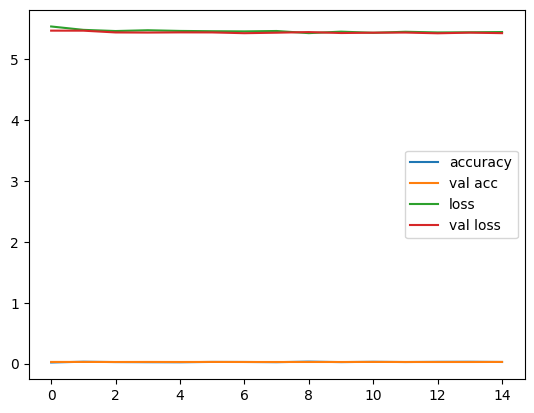

In [28]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()

In [31]:
pred = model_final.predict_generator(val_generator)

C:\Users\skhatta\AppData\Local\Temp\ipykernel_25936\2398290440.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model_final.predict_generator(val_generator)


In [33]:
predicted_classes = np.argmax(pred, axis=1)

In [36]:
true_classes = val_generator.classes

In [38]:
class_labels = list(val_generator.class_indices.keys())

In [40]:
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

                               precision    recall  f1-score   support

                     001.ak47       0.00      0.00      0.00        20
            002.american-flag       0.00      0.00      0.00        20
                 003.backpack       0.00      0.00      0.00        31
             004.baseball-bat       0.00      0.00      0.00        26
           005.baseball-glove       0.00      0.00      0.00        30
          006.basketball-hoop       0.00      0.00      0.00        18
                      007.bat       0.00      0.00      0.00        22
                  008.bathtub       0.00      0.00      0.00        47
                     009.bear       0.00      0.00      0.00        21
                 010.beer-mug       0.00      0.00      0.00        19
                011.billiards       0.00      0.00      0.00        56
               012.binoculars       0.00      0.00      0.00        44
                 013.birdbath       0.00      0.00      0.00        20
     

C:\Users\skhatta\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhatta\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\skhatta\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
